Epoch 1/10
6231/6231 [==============================] - 53s 7ms/step - loss: 0.0109 - accuracy: 0.9990 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 2/10
6231/6231 [==============================] - 43s 7ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 3/10
6231/6231 [==============================] - 43s 7ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 4/10
6231/6231 [==============================] - 45s 7ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9994
Epoch 5/10
6231/6231 [==============================] - 44s 7ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9994
Epoch 6/10
6231/6231 [==============================] - 43s 7ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9991
Epoch 7/10
6231/6231 [==============================] - 44s 7ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0026 - val_ac

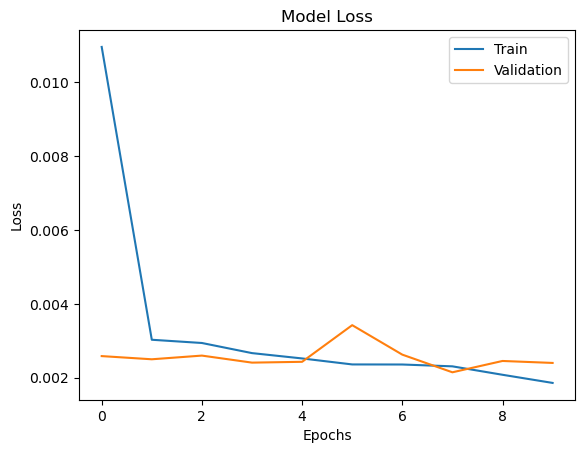

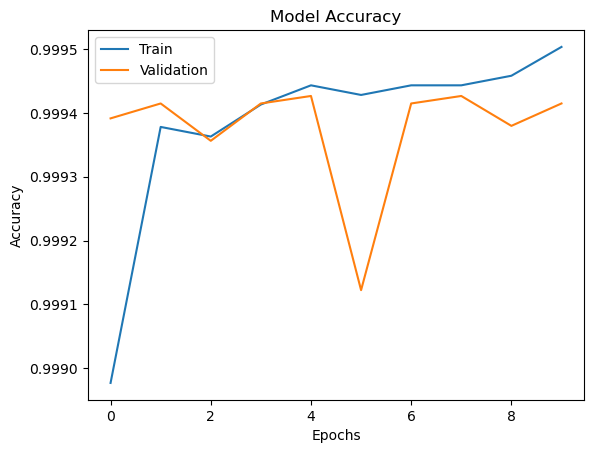

In [1]:
#TRAIN RNNs MODEL
#LSTM IS A TYPE OF RECURENT  NEURAL NETWORKS (RNN) ARCHITECTURE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\creditcard.csv\creditcard.csv')

# DROP UNNEED COLUMN
df.drop('Time', axis=1, inplace=True)

# HANDLE MISSING VALUE
df.dropna(inplace=True)

# ONE-HOT ENCODING
df = pd.get_dummies(df, columns=['Class'], drop_first=True)

# NORMALIZE THE AMOUNT COLUMN USING Z-SCORE NORMALIZATION
df['Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# SPLIT
X = df.drop('Class_1', axis=1)
y = df['Class_1']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# CONVERT DATA TO NUMPY ARRAY

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# RESHAPE THE DATA FOR LSTM INPUT
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# MODEL
model = Sequential()
model.add(LSTM(64, input_shape=(1, 29), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# COMPILE 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# FIT THE MODEL
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# EVALUATE
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.3f}')
print(f'Test Accuracy: {accuracy*100:.3f}%')


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

Epoch 1/10
6231/6231 [==============================] - 73s 11ms/step - loss: 0.0108 - accuracy: 0.9988 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 2/10
6231/6231 [==============================] - 63s 10ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 3/10
6231/6231 [==============================] - 55s 9ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9994
Epoch 4/10
6231/6231 [==============================] - 63s 10ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9990
Epoch 5/10
6231/6231 [==============================] - 53s 9ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9994
Epoch 6/10
6231/6231 [==============================] - 39s 6ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 7/10
6231/6231 [==============================] - 46s 7ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0024 - val

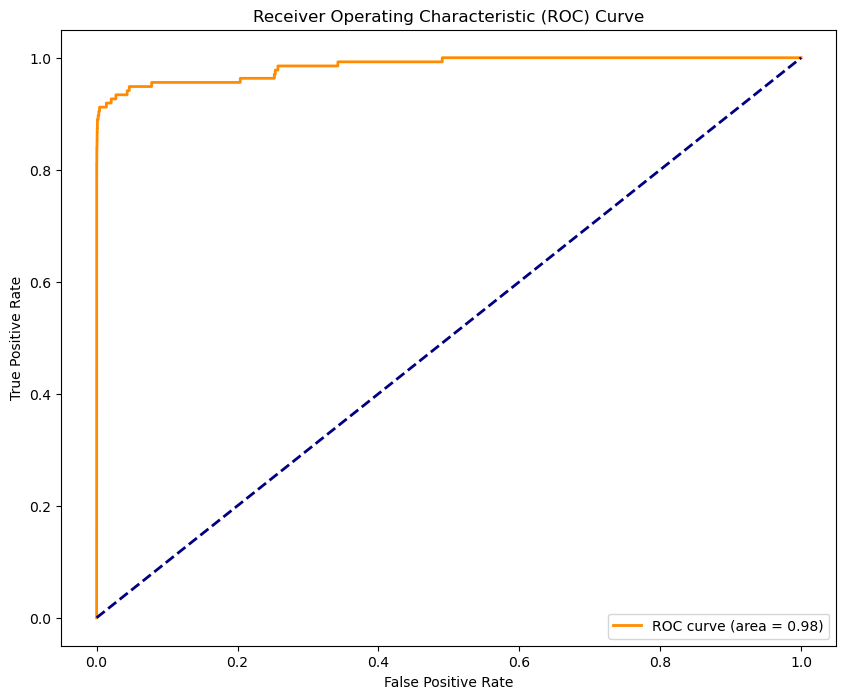

In [3]:

# VISUALIZE ROC CURVE FOR THE MODEL, WITH THE AUC (area under the curbe) SCORE


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import roc_curve, auc


# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\creditcard.csv\creditcard.csv')

# DROP UNNEED COLUMN
df.drop('Time', axis=1, inplace=True)

# HANDLE MISSING VALUE
df.dropna(inplace=True)

# ONE-HOT ENCODING
df = pd.get_dummies(df, columns=['Class'], drop_first=True)

# NORMALIZE THE AMOUNT COLUMN USING Z-SCORE NORMALIZATION
df['Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# SPLIT
X = df.drop('Class_1', axis=1)
y = df['Class_1']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# CONVERT DATA TO NUMPY ARRAY

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# RESHAPE THE DATA FOR LSTM INPUT
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# MODEL
model = Sequential()
model.add(LSTM(64, input_shape=(1, 29), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# COMPILE 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# FIT THE MODEL
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# EVALUATE
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.3f}')
print(f'Test Accuracy: {accuracy*100:.3f}%')


# PREDICTED PROBABILITES
y_prob = model.predict(X_test)

# ROC CURVE AND AUC SCORE
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# VISUALIZE ROC CURVE
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")